In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import numpy as np

from google.colab import files

In [3]:
# Uploading data into google colab
# If running locally, list paths to local locations of train and test data

uploaded = files.upload()

!unzip data.zip

train_dir = '/content/data/train'
test_dir = '/content/data/test'

Saving data.zip to data.zip
Archive:  data.zip
   creating: data/
   creating: data/test/
  inflating: __MACOSX/data/._test    
   creating: data/train/
  inflating: __MACOSX/data/._train   
   creating: data/test/PNEUMONIA/
  inflating: __MACOSX/data/test/._PNEUMONIA  
   creating: data/test/NORMAL/
  inflating: __MACOSX/data/test/._NORMAL  
  inflating: data/train/.DS_Store    
  inflating: __MACOSX/data/train/._.DS_Store  
   creating: data/train/PNEUMONIA/
  inflating: __MACOSX/data/train/._PNEUMONIA  
   creating: data/train/NORMAL/
  inflating: __MACOSX/data/train/._NORMAL  
  inflating: data/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9.jpeg  
  inflating: __MACOSX/data/test/PNEUMONIA/._SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9.jpeg  
  inflating: data/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day17.jpeg  
  inflating: __MACOSX/data/test/PNEUMONIA/._SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day17.jpeg  
  inflating: data/test/PNEUMONIA/SARS-

In [4]:
# Create training set Datagenerator for image augmentations
# Create separate training and validation sets so we can use test set as a holdout sample

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'

)

val_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)



Found 120 images belonging to 2 classes.
Found 28 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 148, 148, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 72, 72, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5029 - loss: 1.1023 - val_accuracy: 0.6429 - val_loss: 0.6397
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 902ms/step - accuracy: 0.4909 - loss: 0.6854 - val_accuracy: 0.8214 - val_loss: 0.6041
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 893ms/step - accuracy: 0.7895 - loss: 0.5492 - val_accuracy: 0.8214 - val_loss: 0.5139
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 829ms/step - accuracy: 0.8652 - loss: 0.4122 - val_accuracy: 0.7500 - val_loss: 0.4818
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 911ms/step - accuracy: 0.8908 - loss: 0.3467 - val_accuracy: 0.7500 - val_loss: 0.4875
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 894ms/step - accuracy: 0.8725 - loss: 0.3109 - val_accuracy: 0.6429 - val_loss: 0.5273
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 816ms/step - accuracy: 0.8707 - loss: 0.2944 - val_accuracy: 0.7857 - val_loss: 0.5122
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 908ms/step - accuracy: 0.8856 - loss: 0.2678 - val_accuracy: 0.6429 - val_loss: 0

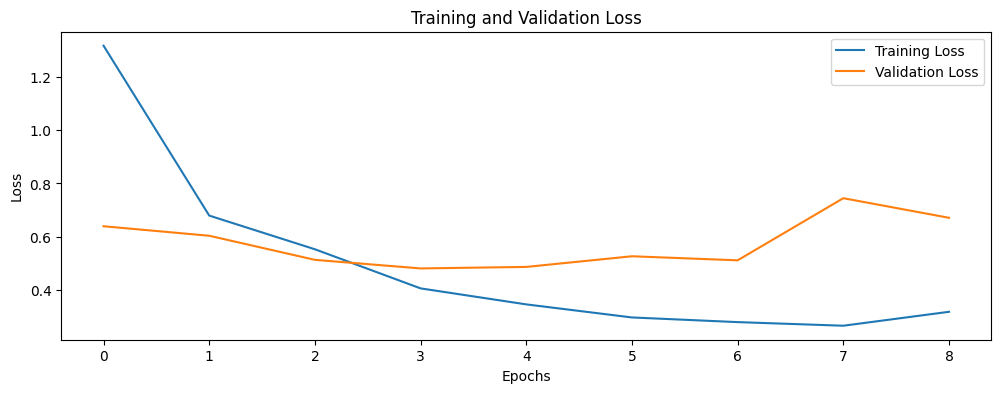

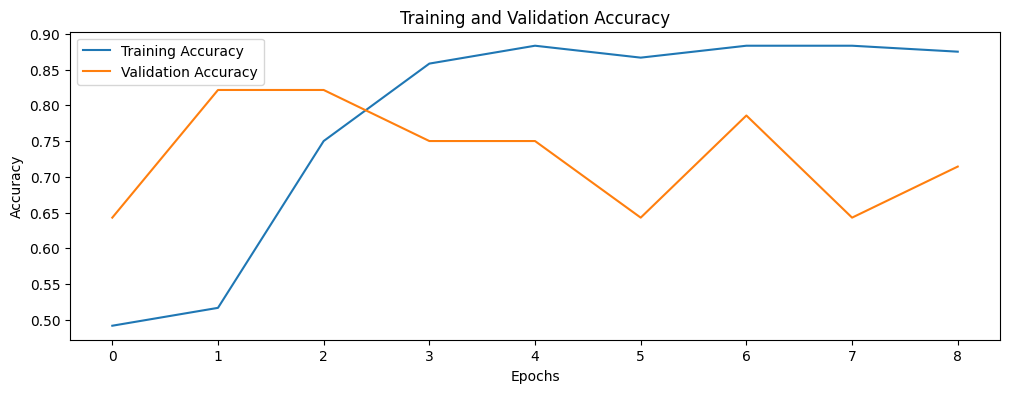

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step
              precision    recall  f1-score   support

      NORMAL       1.00      1.00      1.00        20
   PNEUMONIA       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



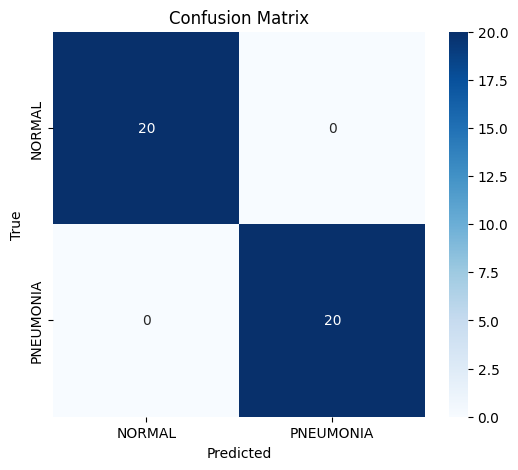

In [5]:
# Best Model

def CNN_model():
  model = Sequential()

  # First Conv Block

  model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
  model.add(LeakyReLU(0.01))
  model.add(MaxPooling2D((2, 2)))

  # Second Conv Block

  model.add(Conv2D(64, (3, 3)))
  model.add(LeakyReLU(0.01))
  model.add(MaxPooling2D((2, 2)))

  # Hidden Layers

  model.add(Flatten())
  model.add(Dense(128))
  model.add(LeakyReLU(0.01))
  model.add(Dropout(0.5))

  # Output

  model.add(Dense(1, activation='sigmoid'))

  # Compile and train model

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  model.summary()

  # train on generated images, add early stopping callback to prevent overfitting
  history = model.fit(train_generator,
                      epochs = 50,
                      validation_data = val_generator,
                      callbacks = tf.keras.callbacks.EarlyStopping(patience=5))

  return model, history

cnn_model, cnn_history = CNN_model()

# Loss
plt.figure(figsize=(12, 4))
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Accuracy
plt.figure(figsize=(12, 4))
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Reset test generator so the generator starts at first image in test set
test_generator.reset()
y_pred_prob = cnn_model.predict(test_generator)

# threshold probabilities
y_pred = (y_pred_prob > 0.5).astype("int32")


#list classes
y_true = test_generator.classes
labels = list(test_generator.class_indices.keys())


#classification report for precision, recall, and f1
print(classification_report(y_true, y_pred, target_names=labels))

# confusion matri
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5287 - loss: 1.2544 - val_accuracy: 0.5000 - val_loss: 1.4222
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 882ms/step - accuracy: 0.5846 - loss: 1.0468 - val_accuracy: 0.7500 - val_loss: 0.6158
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 919ms/step - accuracy: 0.7790 - loss: 0.5677 - val_accuracy: 0.6071 - val_loss: 0.6000
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 872ms/step - accuracy: 0.8357 - loss: 0.5012 - val_accuracy: 0.5714 - val_loss: 0.6232
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 970ms/step - accuracy: 0.8027 - loss: 0.4343 - val_accuracy: 0.7143 - val_loss: 0.5236
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 932ms/step - accuracy: 0.8817 - loss: 0.3287 - val_accuracy: 0.6786 - val_loss: 0.5834
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 842ms/step - accuracy: 0.8650 - loss: 0.3811 - val_accuracy: 0.6786 - val_loss: 0.5862
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 880ms/step - accuracy: 0.8700 - loss: 0.2929 - val_accuracy: 0.7143 - val_loss: 0.

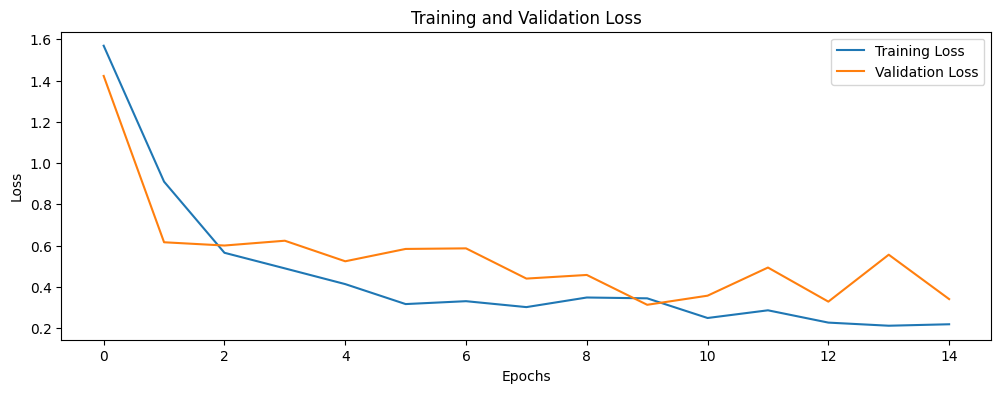

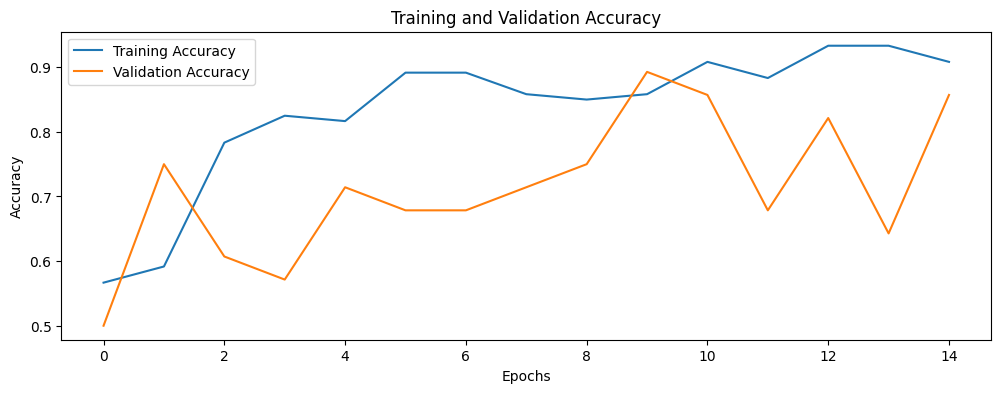

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 376ms/step
              precision    recall  f1-score   support

      NORMAL       0.91      1.00      0.95        20
   PNEUMONIA       1.00      0.90      0.95        20

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



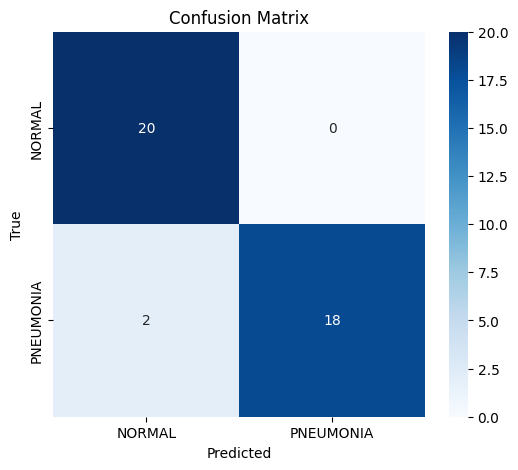

In [7]:
def CNN_Relu_model():
  model = Sequential()

  # First Conv Block

  model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation = 'relu'))
  model.add(MaxPooling2D((2, 2)))

  # Second Conv Block

  model.add(Conv2D(64, (3, 3), activation = 'relu'))
  model.add(MaxPooling2D((2, 2)))

  # Hidden Layers

  model.add(Flatten())
  model.add(Dense(128, activation = 'relu'))
  model.add(Dropout(0.5))

  # Output

  model.add(Dense(1, activation='sigmoid'))

  # Compile and train model

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  model.summary()

  # train on generated images, add early stopping callback to prevent overfitting
  history = model.fit(train_generator,
                      epochs = 50,
                      validation_data = val_generator,
                      callbacks = tf.keras.callbacks.EarlyStopping(patience=5))

  return model, history

relu_model, relu_history = CNN_Relu_model()


# Loss
plt.figure(figsize=(12, 4))
plt.plot(relu_history.history['loss'], label='Training Loss')
plt.plot(relu_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Accuracy
plt.figure(figsize=(12, 4))
plt.plot(relu_history.history['accuracy'], label='Training Accuracy')
plt.plot(relu_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Reset test generator so the generator starts at first image in test set
test_generator.reset()
y_pred_prob = relu_model.predict(test_generator)

# threshold probabilities
y_pred = (y_pred_prob > 0.5).astype("int32")


#list classes
y_true = test_generator.classes
labels = list(test_generator.class_indices.keys())


#classification report for precision, recall, and f1
print(classification_report(y_true, y_pred, target_names=labels))

# confusion matri
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4951 - loss: 2.1944 - val_accuracy: 0.5000 - val_loss: 2.5867
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 929ms/step - accuracy: 0.5100 - loss: 2.6265 - val_accuracy: 0.5000 - val_loss: 1.4689
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 899ms/step - accuracy: 0.4940 - loss: 1.3884 - val_accuracy: 0.5000 - val_loss: 1.1543
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 815ms/step - accuracy: 0.5210 - loss: 1.2440 - val_accuracy: 0.5000 - val_loss: 1.0184
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 872ms/step - accuracy: 0.4994 - loss: 1.2006 - val_accuracy: 0.5000 - val_loss: 0.9028
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 862ms/step - accuracy: 0.5810 - loss: 0.9307 - val_accuracy: 0.5000 - val_loss: 0.7319
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 936ms/step - accuracy: 0.5535 - loss: 0.8988 - val_accuracy: 0.5000 - val_loss: 0.6996
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 928ms/step - accuracy: 0.4930 - loss: 0.9492 - val_accuracy: 0.5000 - val_loss: 0.

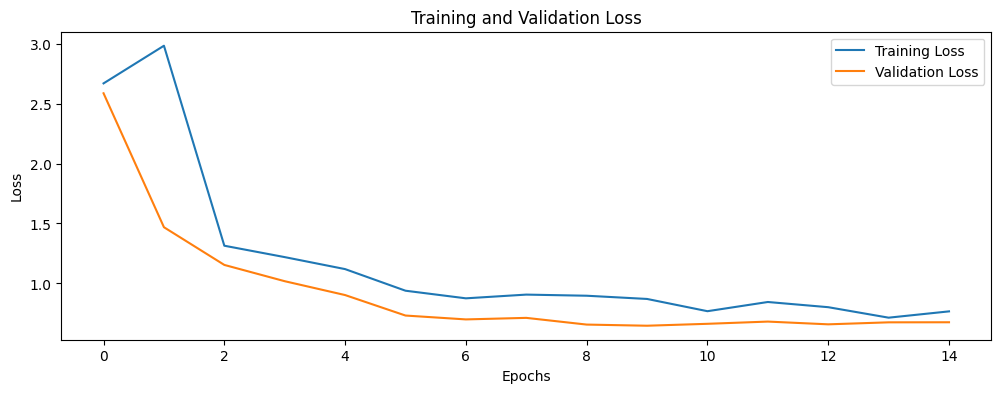

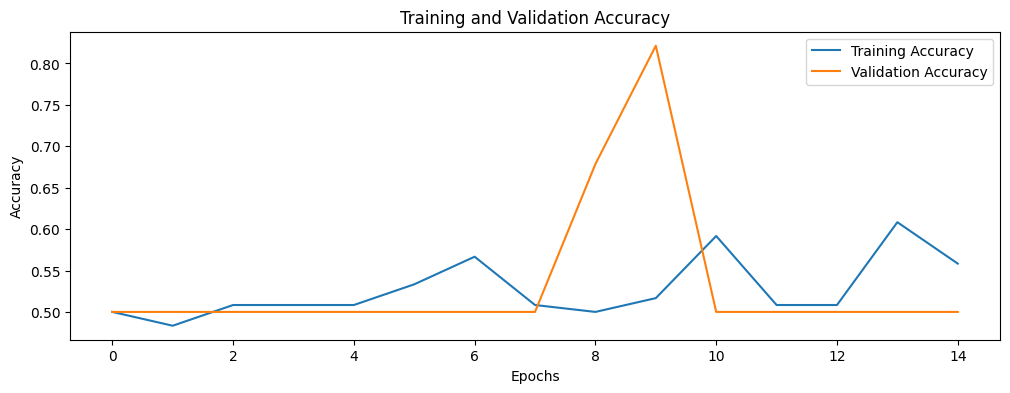

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 370ms/step
              precision    recall  f1-score   support

      NORMAL       0.50      1.00      0.67        20
   PNEUMONIA       0.00      0.00      0.00        20

    accuracy                           0.50        40
   macro avg       0.25      0.50      0.33        40
weighted avg       0.25      0.50      0.33        40



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


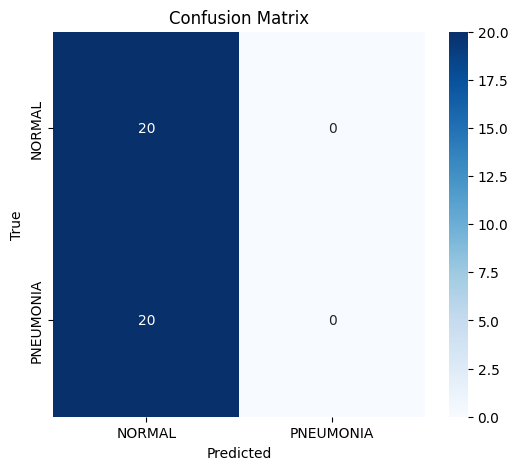

In [10]:
# Tanh Model

def CNN_tanh_model():
  model = Sequential()

  # First Conv Block

  model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation = 'tanh'))
  model.add(MaxPooling2D((2, 2)))

  # Second Conv Block

  model.add(Conv2D(64, (3, 3), activation = 'tanh'))
  model.add(MaxPooling2D((2, 2)))

  # Hidden Layers

  model.add(Flatten())
  model.add(Dense(128, activation = 'tanh'))
  model.add(Dropout(0.5))

  # Output

  model.add(Dense(1, activation='sigmoid'))

  # Compile and train model

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  model.summary()

  # train on generated images, add early stopping callback to prevent overfitting
  history = model.fit(train_generator,
                      epochs = 50,
                      validation_data = val_generator,
                      callbacks = tf.keras.callbacks.EarlyStopping(patience=5))

  return model, history

tanh_model, tanh_history = CNN_tanh_model()


# Loss
plt.figure(figsize=(12, 4))
plt.plot(tanh_history.history['loss'], label='Training Loss')
plt.plot(tanh_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Accuracy
plt.figure(figsize=(12, 4))
plt.plot(tanh_history.history['accuracy'], label='Training Accuracy')
plt.plot(tanh_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Reset test generator so the generator starts at first image in test set
test_generator.reset()
y_pred_prob = tanh_model.predict(test_generator)

# threshold probabilities
y_pred = (y_pred_prob > 0.5).astype("int32")


#list classes
y_true = test_generator.classes
labels = list(test_generator.class_indices.keys())


#classification report for precision, recall, and f1
print(classification_report(y_true, y_pred, target_names=labels))

# confusion matri
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 148, 148, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 175232)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │      22,429,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,430,849 (85.57 MB)

 Trainable params: 22,430,849 (85.57 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5365 - loss: 7.2226 - val_accuracy: 0.8571 - val_loss: 0.4245
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 801ms/step - accuracy: 0.6725 - loss: 3.1475 - val_accuracy: 0.6429 - val_loss: 1.4525
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 844ms/step - accuracy: 0.6733 - loss: 2.2912 - val_accuracy: 0.5357 - val_loss: 1.4406
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 927ms/step - accuracy: 0.7874 - loss: 0.8373 - val_accuracy: 0.8214 - val_loss: 0.3825
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 915ms/step - accuracy: 0.8517 - loss: 0.4050 - val_accuracy: 0.7500 - val_loss: 0.4559
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 944ms/step - accuracy: 0.8748 - loss: 0.3143 - val_accuracy: 0.8214 - val_loss: 0.4424
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 811ms/step - accuracy: 0.8224 - loss: 0.4159 - val_accuracy: 0.6429 - val_loss: 0.5251
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.8435 - loss: 0.3577 - val_accuracy: 0.8929 - val_loss: 0.309

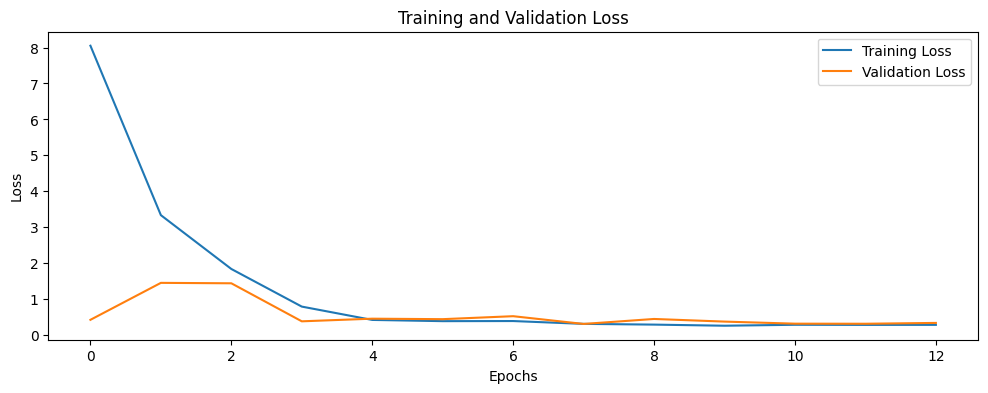

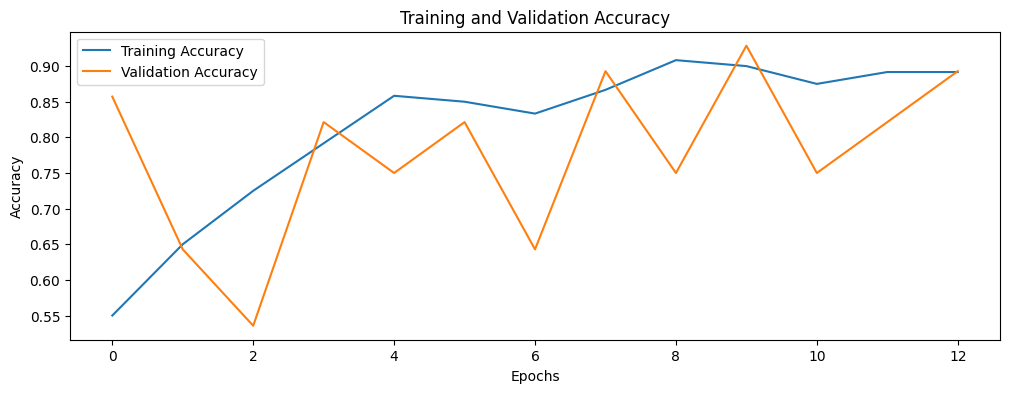

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
              precision    recall  f1-score   support

      NORMAL       0.95      1.00      0.98        20
   PNEUMONIA       1.00      0.95      0.97        20

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



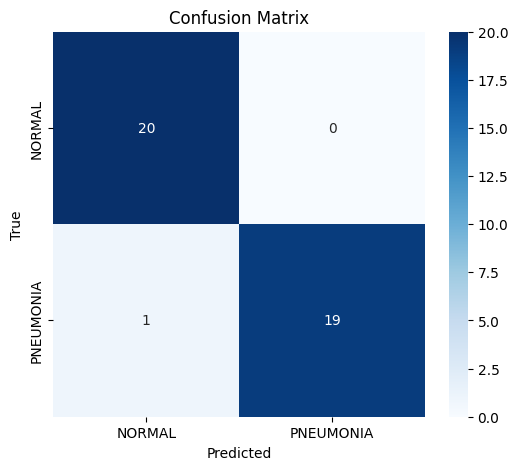

In [11]:
# One Conv Block w/ Leaku ReLU

def CNN_oneblock_model():
  model = Sequential()

  # First Conv Block

  model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
  model.add(LeakyReLU(0.01))
  model.add(MaxPooling2D((2, 2)))

  # Hidden Layers

  model.add(Flatten())
  model.add(Dense(128))
  model.add(LeakyReLU(0.01))
  model.add(Dropout(0.5))

  # Output

  model.add(Dense(1, activation='sigmoid'))

  # Compile and train model

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  model.summary()

  # train on generated images, add early stopping callback to prevent overfitting
  history = model.fit(train_generator,
                      epochs = 50,
                      validation_data = val_generator,
                      callbacks = tf.keras.callbacks.EarlyStopping(patience=5))

  return model, history


one_model, one_history = CNN_oneblock_model()

# Loss
plt.figure(figsize=(12, 4))
plt.plot(one_history.history['loss'], label='Training Loss')
plt.plot(one_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Accuracy
plt.figure(figsize=(12, 4))
plt.plot(one_history.history['accuracy'], label='Training Accuracy')
plt.plot(one_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Reset test generator so the generator starts at first image in test set
test_generator.reset()
y_pred_prob = one_model.predict(test_generator)

# threshold probabilities
y_pred = (y_pred_prob > 0.5).astype("int32")


#list classes
y_true = test_generator.classes
labels = list(test_generator.class_indices.keys())


#classification report for precision, recall, and f1
print(classification_report(y_true, y_pred, target_names=labels))

# confusion matri
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 148, 148, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 175232)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │      22,429,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,430,849 (85.57 MB)

 Trainable params: 22,430,849 (85.57 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5244 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 814ms/step - accuracy: 0.4708 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 866ms/step - accuracy: 0.4906 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 884ms/step - accuracy: 0.5093 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 914ms/step - accuracy: 0.4445 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 859ms/step - accuracy: 0.4958 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00


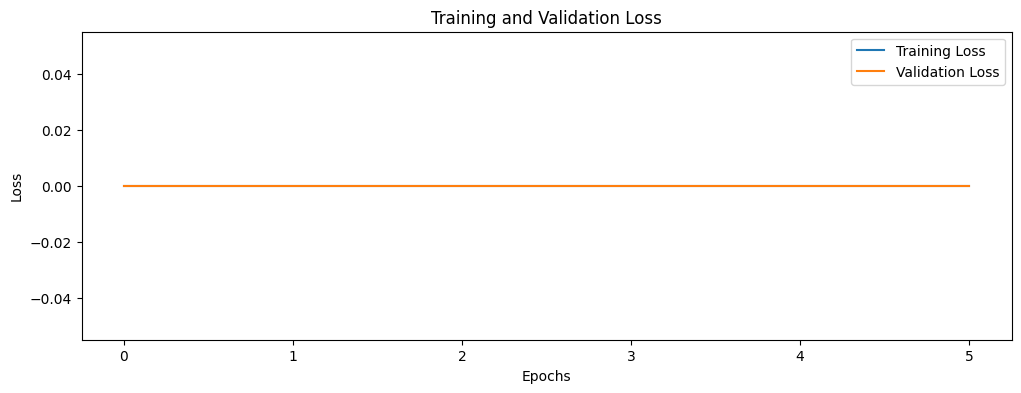

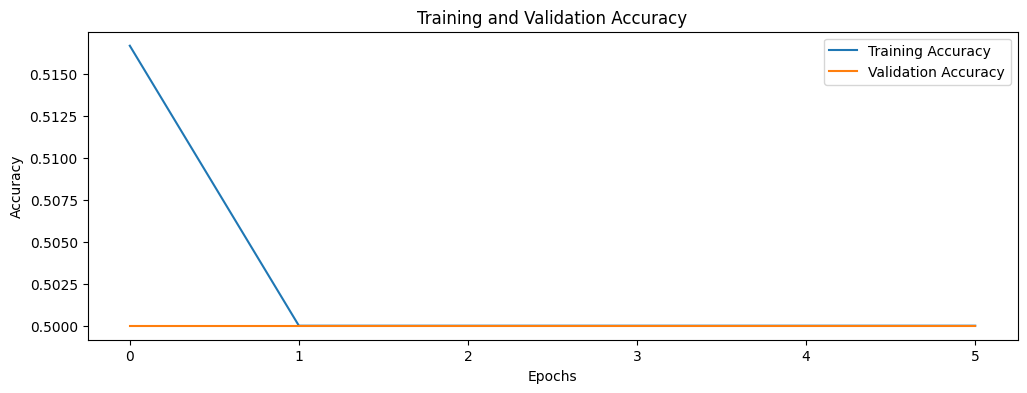

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step
              precision    recall  f1-score   support

      NORMAL       0.50      1.00      0.67        20
   PNEUMONIA       0.00      0.00      0.00        20

    accuracy                           0.50        40
   macro avg       0.25      0.50      0.33        40
weighted avg       0.25      0.50      0.33        40



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


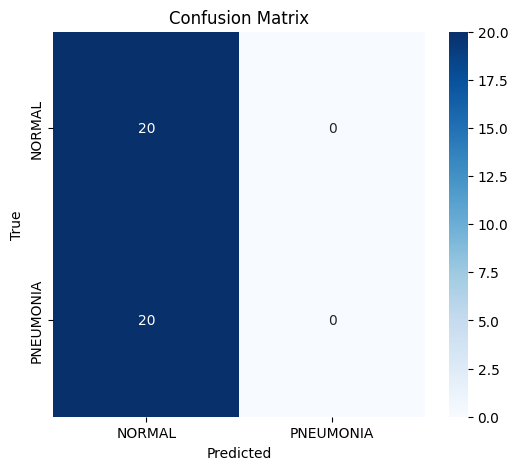

In [12]:
# Categorical Cross Entropy Loss

def cat_model():
  model = Sequential()

  # First Conv Block

  model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
  model.add(LeakyReLU(0.01))
  model.add(MaxPooling2D((2, 2)))

  # Hidden Layers

  model.add(Flatten())
  model.add(Dense(128))
  model.add(LeakyReLU(0.01))
  model.add(Dropout(0.5))

  # Output

  model.add(Dense(1, activation='sigmoid'))

  # Compile and train model

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  model.summary()

  # train on generated images, add early stopping callback to prevent overfitting
  history = model.fit(train_generator,
                      epochs = 50,
                      validation_data = val_generator,
                      callbacks = tf.keras.callbacks.EarlyStopping(patience=5))

  return model, history


cat_model, cat_history = cat_model()

# Loss
plt.figure(figsize=(12, 4))
plt.plot(cat_history.history['loss'], label='Training Loss')
plt.plot(cat_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Accuracy
plt.figure(figsize=(12, 4))
plt.plot(cat_history.history['accuracy'], label='Training Accuracy')
plt.plot(cat_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Reset test generator so the generator starts at first image in test set
test_generator.reset()
y_pred_prob = cat_model.predict(test_generator)

# threshold probabilities
y_pred = (y_pred_prob > 0.5).astype("int32")


#list classes
y_true = test_generator.classes
labels = list(test_generator.class_indices.keys())


#classification report for precision, recall, and f1
print(classification_report(y_true, y_pred, target_names=labels))

# confusion matri
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()